# Descriptive Statistics: 'Commercial Districts' and 'Street Business' Data

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 1. Data Load and Missing Values

In [2]:
# initial csv file is seperated by '|'
df = pd.read_csv("seoul_store_info.csv", sep='|')
df.shape

(573680, 39)

In [3]:
df.index

RangeIndex(start=0, stop=573680, step=1)

In [4]:
# check column names
pd.options.display.max_columns = 39
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

<AxesSubplot:>

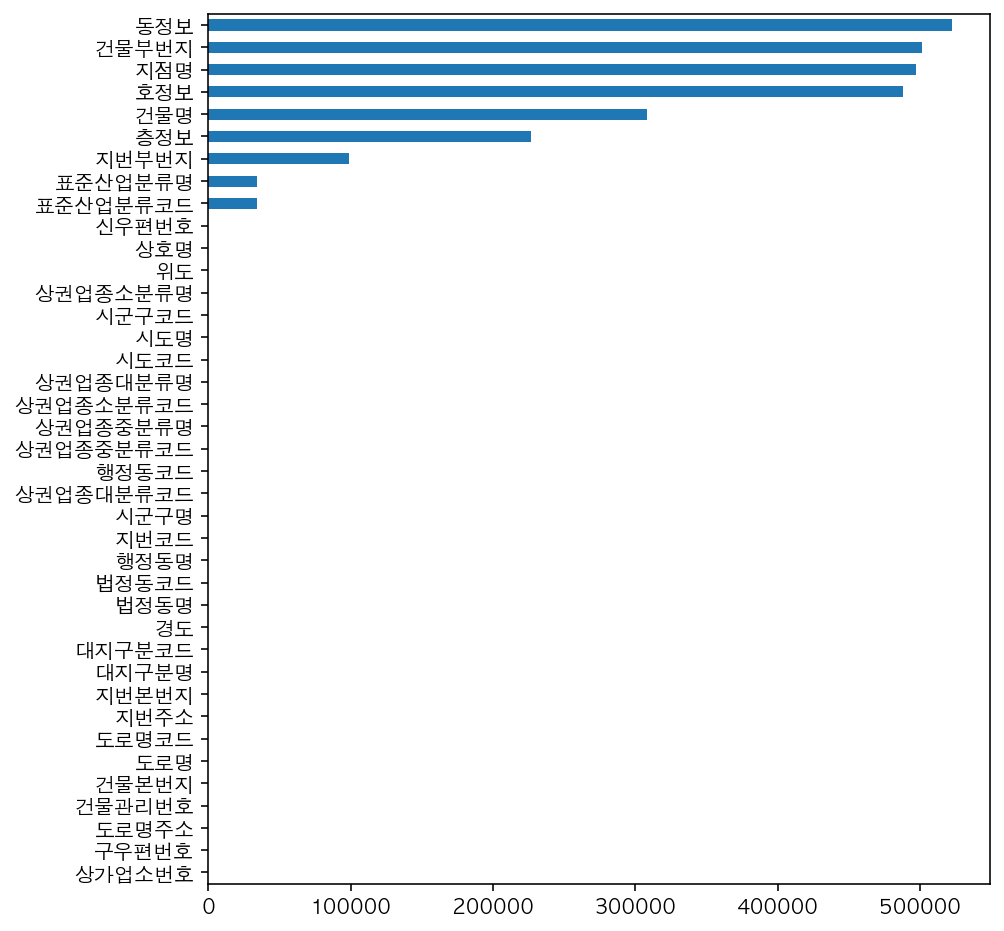

In [5]:
# 'true's are empty values
# True == 1
n = df.isnull().sum()
n.sort_values().plot.barh(figsize=(7,8))

## 2. Missing Value Visualization by 'missingno' Library

<AxesSubplot:>

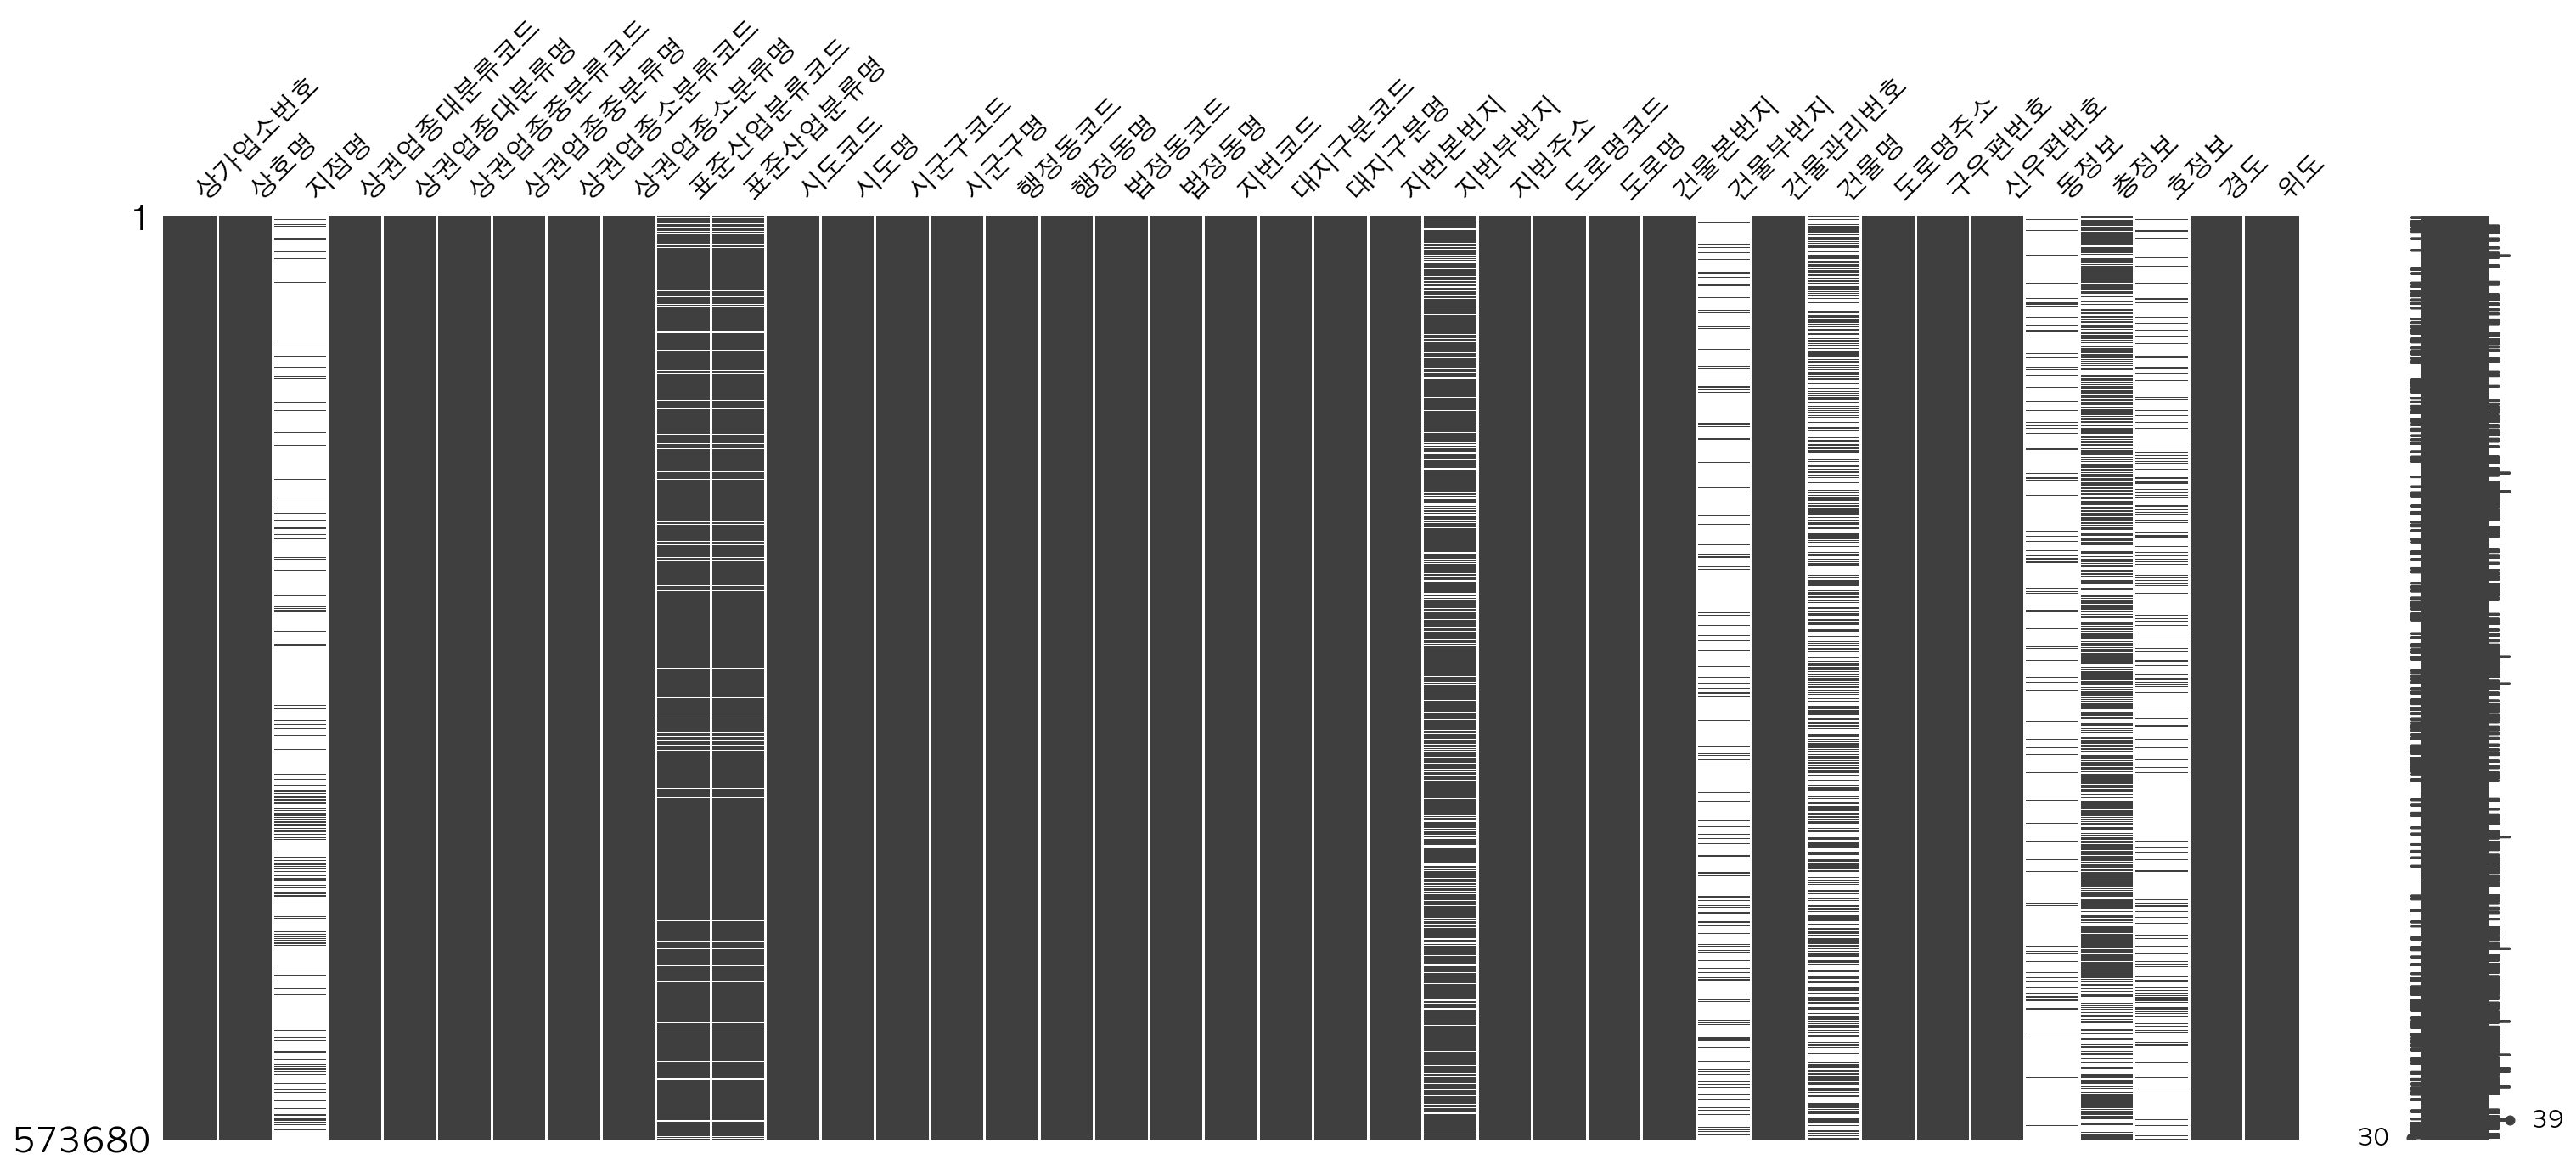

In [6]:
import missingno as msno

msno.matrix(df)

<AxesSubplot:>

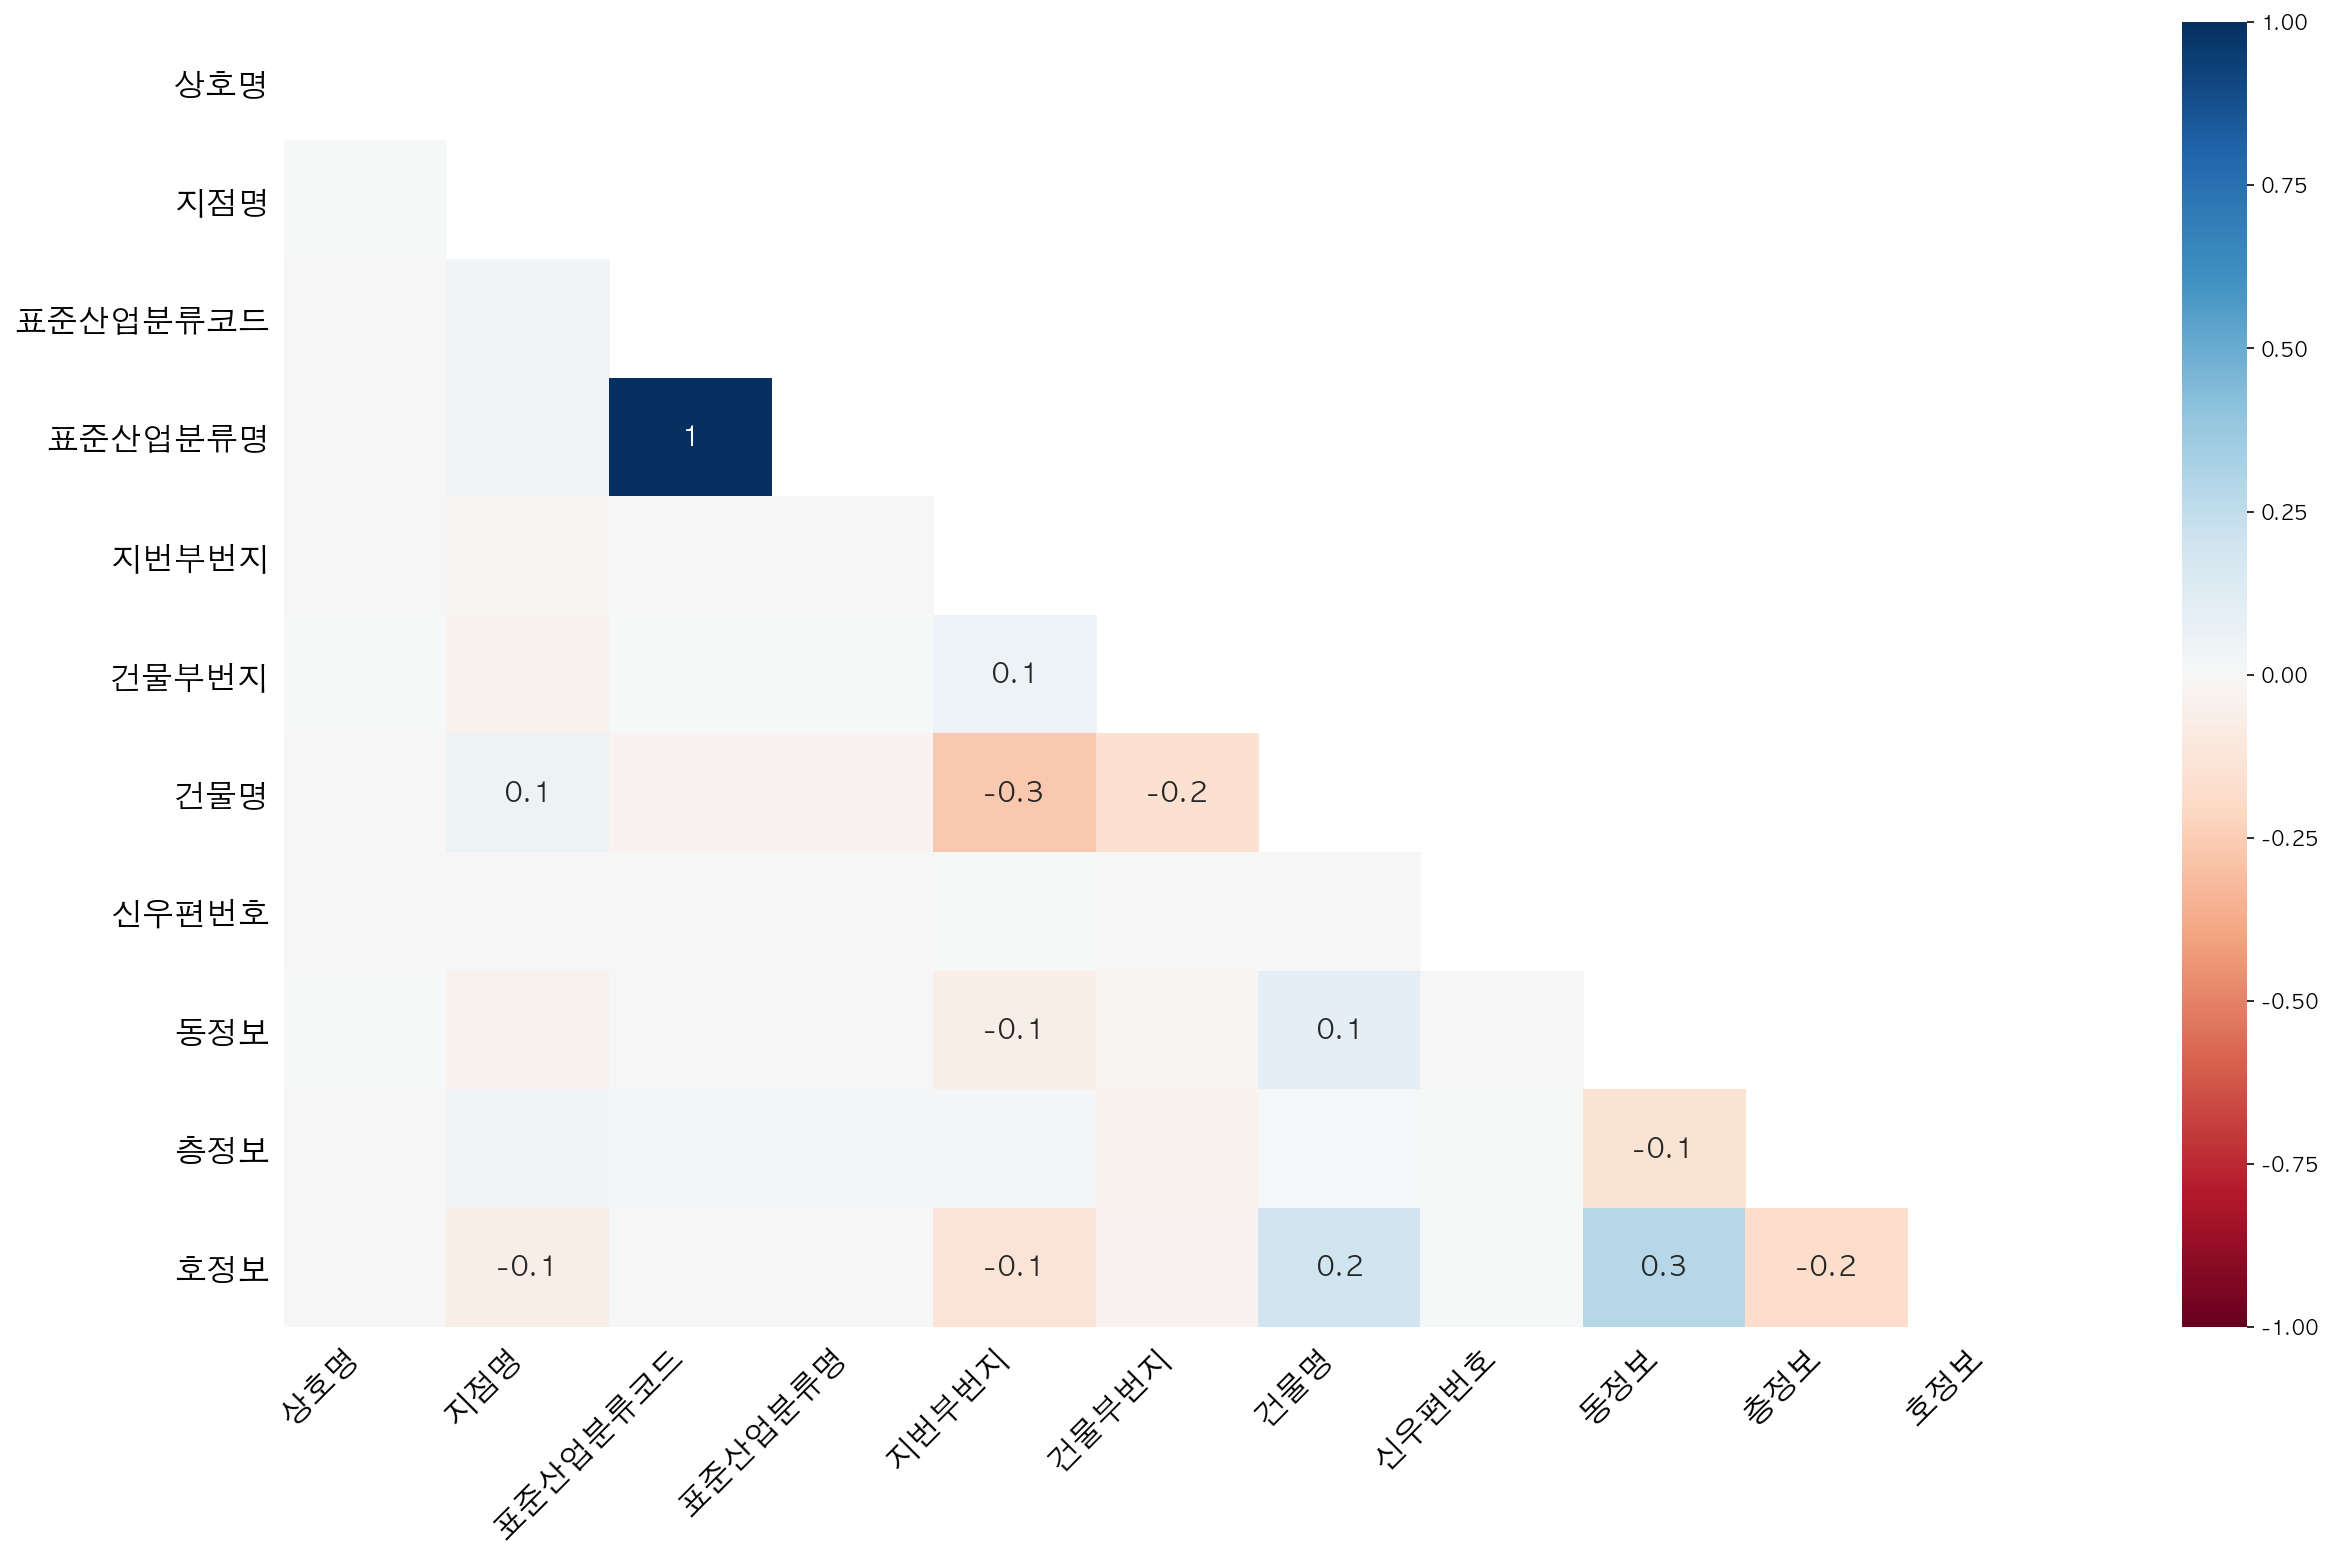

In [7]:
# by heatmap(corelation coefficient)
msno.heatmap(df)

<AxesSubplot:>

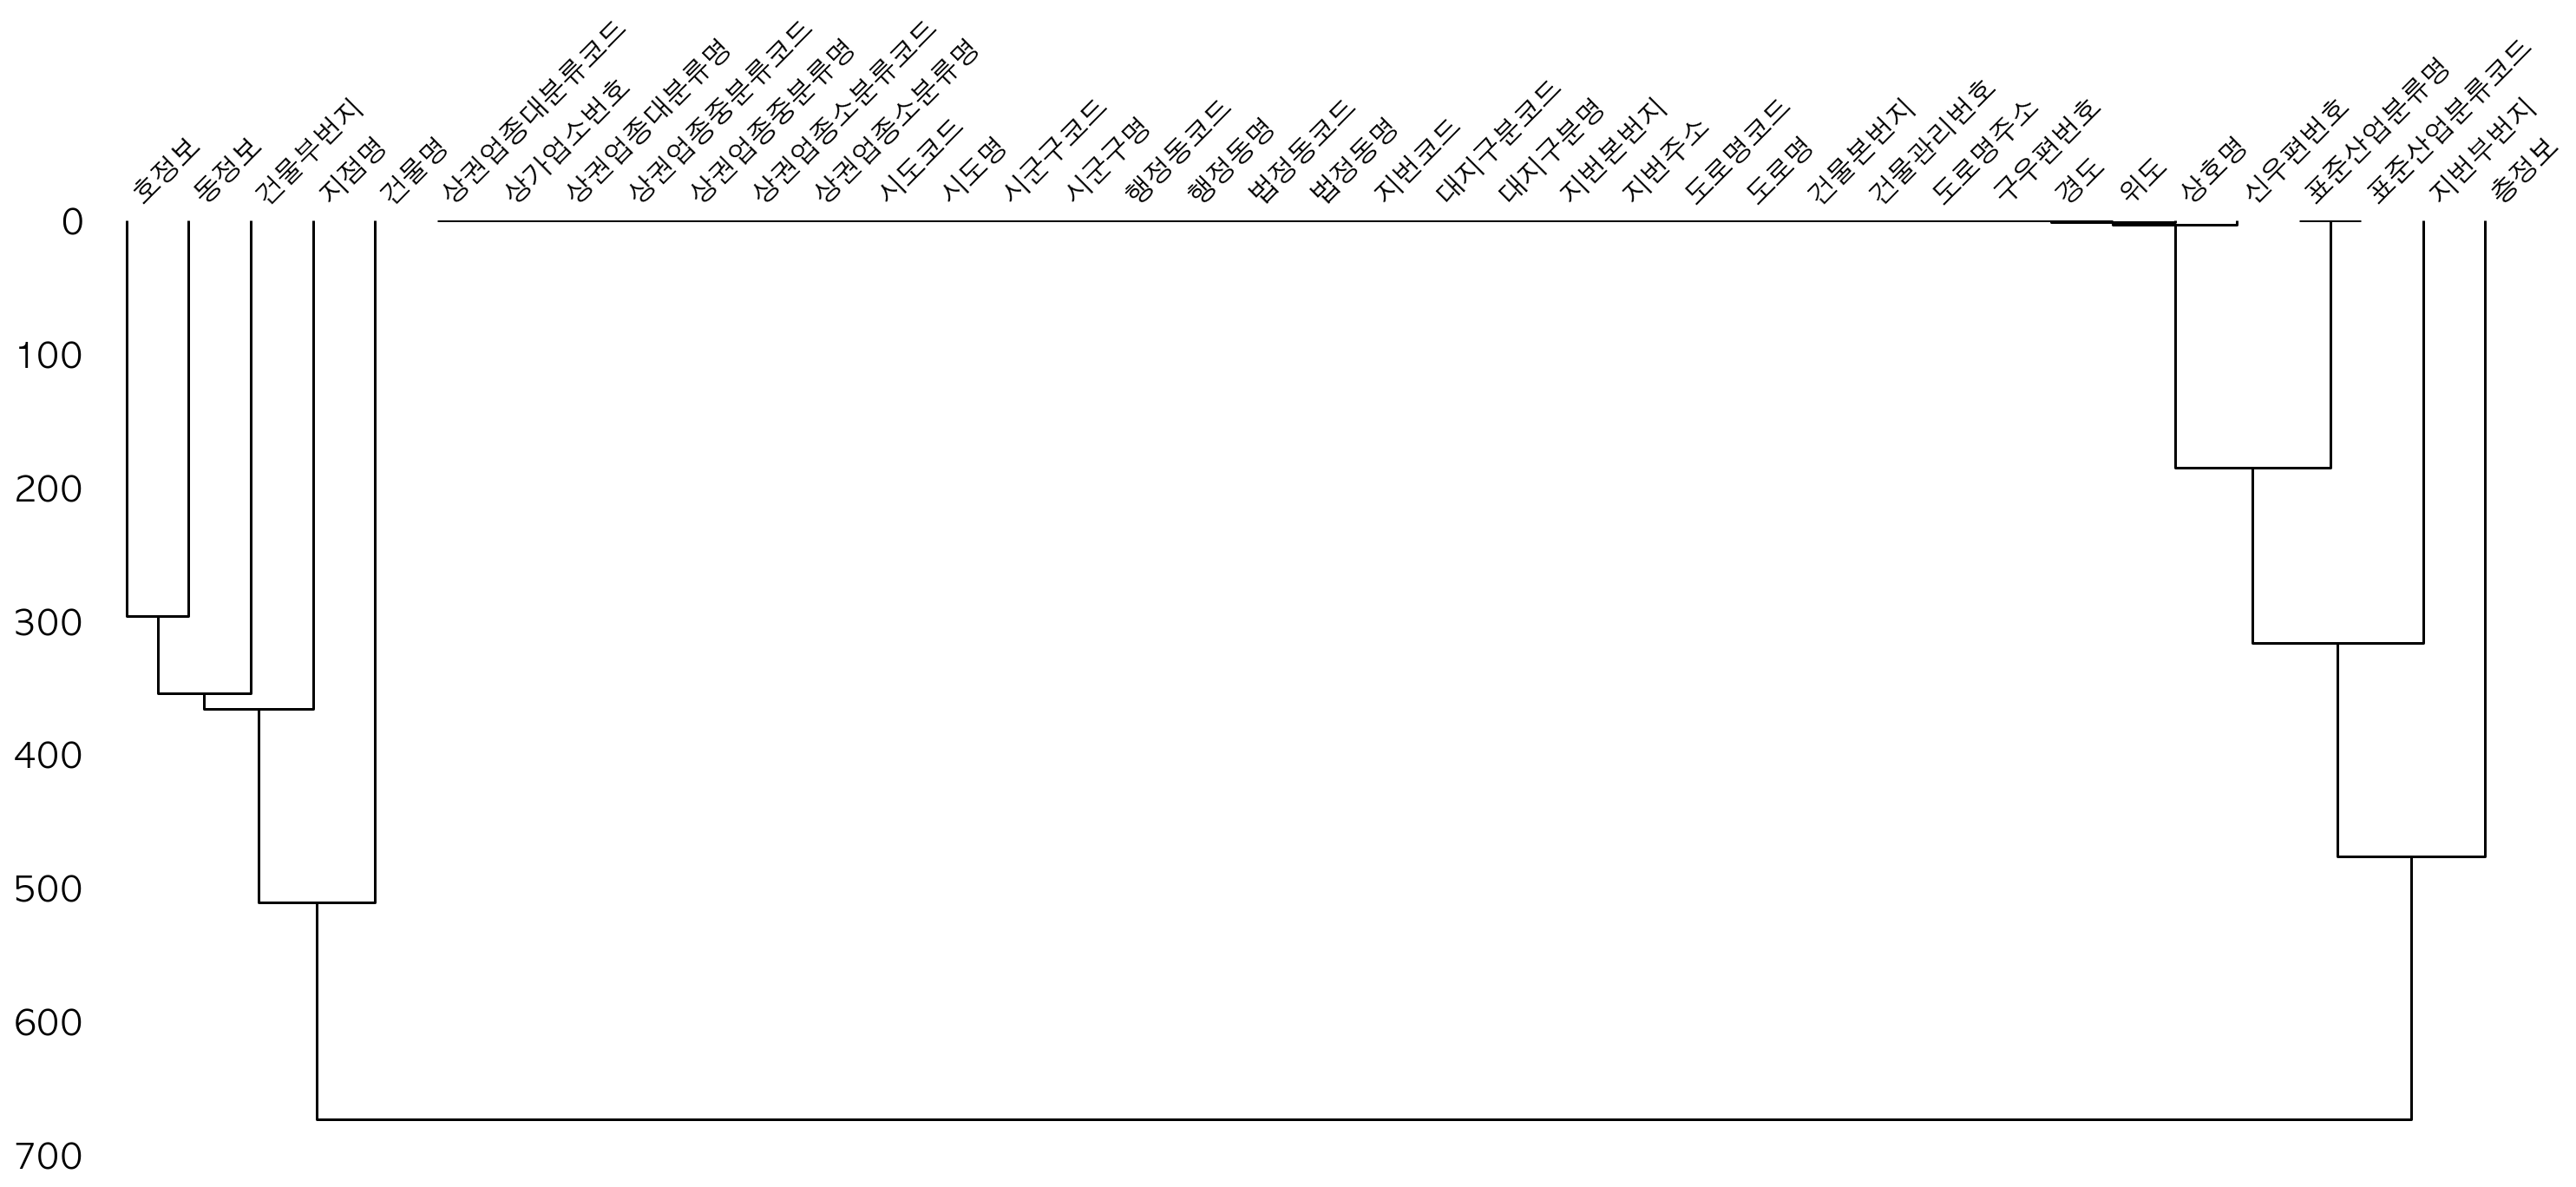

In [8]:
msno.dendrogram(df)

### Drop Unnecessary Columns

In [9]:
# drop unnecessary columns (most null values)
print(df.shape)
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


In [10]:
# drop unnecessary columns (unused)
cols = df.columns
cols_code = cols[cols.str.contains("코드|번호")]
cols_code
print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


## 3. Data Preprocessing: Raw Korean Data to Useable DataFrame

In [11]:
df = df[["상호명", "상권업종대분류명", "상권업종중분류명", "상권업종소분류명", "시도명", "시군구명", "도로명주소", "경도", "위도"]]
df = df.rename(columns={"상호명":"Store Name","상권업종대분류명":"Business Type","상권업종중분류명":"Subtype","상권업종소분류명":"Specialty", "시도명":"City", "시군구명":"District", "도로명주소":"Address", "경도":"Longitude", "위도":"Latitude"})
df

,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,서울특별시 송파구 가락로 71,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


In [12]:
# Business Type
df.loc[df["Business Type"].str.contains("음식"), "Business Type"] = "Restaurant"
df.loc[df["Business Type"].str.contains("생활서비스"), "Business Type"] = "Service"
df.loc[df["Business Type"].str.contains("소매"), "Business Type"] = "Retail"
df.loc[df["Business Type"].str.contains("의료"), "Business Type"] = "Hospital/Pharmacy"
df.loc[df["Business Type"].str.contains("학문"), "Business Type"] = "Education"
df.loc[df["Business Type"].str.contains("관광"), "Business Type"] = "Leisure/Travel/Entertainment"
df.loc[df["Business Type"].str.contains("부동산"), "Business Type"] = "Finance"
df.loc[df["Business Type"].str.contains("숙박"), "Business Type"] = "Hotel"
df.loc[df["Business Type"].str.contains("스포츠"), "Business Type"] = "Sports Centre"

# Subtype(Food)
df.loc[df["Subtype"].str.contains("유흥주점"), "Subtype"] = "Bar/Liquor Store"
df.loc[df["Subtype"].str.contains("커피점/카페"), "Subtype"] = "Caffe/Tea"
df.loc[df["Subtype"].str.contains("패스트푸드"), "Subtype"] = "Fast Food"
df.loc[df["Subtype"].str.contains("일식/수산물"), "Subtype"] = "Japanese/Seafood"
df.loc[df["Subtype"].str.contains("분식"), "Subtype"] = "Snack"
df.loc[df["Subtype"].str.contains("한식"), "Subtype"] = "Korean Food"
df.loc[df["Subtype"].str.contains("양식"), "Subtype"] = "Western/Italian"
df.loc[df["Subtype"].str.contains("중식"), "Subtype"] = "Chinese/Hong Kong"
df.loc[df["Subtype"].str.contains("별식"), "Subtype"] = "Fusion"
df.loc[df["Subtype"].str.contains("닭"), "Subtype"] = "Chicken"
df.loc[df["Subtype"].str.contains("Restaurant"), "Subtype"] = "Family Restaurant"
df.loc[df["Subtype"].str.contains("제과제빵떡케익"), "Subtype"] = "Bread/Cake/Cookie"
df.loc[df["Subtype"].str.contains("부페"), "Subtype"] = "Buffet"

# City
df.loc[df["City"].str.contains("서울특별시"), "City"] = "Seoul"
df.loc[df["City"].str.contains("부산광역시"), "City"] = "Busan"

# District
df.loc[df["District"].str.contains("종로구"), "District"] = "Jongno-gu"
df.loc[df["District"].str.contains("중구"), "District"] = "Jung-gu"
df.loc[df["District"].str.contains("용산구"), "District"] = "Yongsan-gu"
df.loc[df["District"].str.contains("성동구"), "District"] = "Seongdong-gu"
df.loc[df["District"].str.contains("광진구"), "District"] = "Gwangjin-gu"
df.loc[df["District"].str.contains("동대문구"), "District"] = "Dongdaemun-gu"
df.loc[df["District"].str.contains("중랑구"), "District"] = "Jungnang-gu"
df.loc[df["District"].str.contains("성북구"), "District"] = "Seongbuk-gu"
df.loc[df["District"].str.contains("강북구"), "District"] = "Gangbuk-gu"
df.loc[df["District"].str.contains("도봉구"), "District"] = "Dobong-gu"
df.loc[df["District"].str.contains("노원구"), "District"] = "Nowon-gu"
df.loc[df["District"].str.contains("은평구"), "District"] = "Eunpyeong-gu"
df.loc[df["District"].str.contains("서대문구"), "District"] = "Seodaemun-gu"
df.loc[df["District"].str.contains("마포구"), "District"] = "Mapo-gu"
df.loc[df["District"].str.contains("양천구"), "District"] = "Yangcheon-gu"
df.loc[df["District"].str.contains("강서구"), "District"] = "Gangseo-gu"
df.loc[df["District"].str.contains("구로구"), "District"] = "Guro-gu"
df.loc[df["District"].str.contains("금천구"), "District"] = "Geumcheon-gu"
df.loc[df["District"].str.contains("영등포구"), "District"] = "Yeongdeungpo-gu"
df.loc[df["District"].str.contains("동작구"), "District"] = "Dongjak-gu"
df.loc[df["District"].str.contains("관악구"), "District"] = "Gwanak-gu"
df.loc[df["District"].str.contains("서초구"), "District"] = "Seocho-gu"
df.loc[df["District"].str.contains("강남구"), "District"] = "Gangnam-gu"
df.loc[df["District"].str.contains("송파구"), "District"] = "Songpa-gu"
df.loc[df["District"].str.contains("강동구"), "District"] = "Gangdong-gu"
df.loc[df["District"].str.contains("타시도|기타"), "District"] = "Another City"

In [13]:
file_name = 'df_modified.csv'
df.to_csv(file_name, index=False)

## 3. Descriptive Statistics: 'Univariate' and 'Bivariate' Analysis

### Summarize by 'describe'

In [14]:
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.
df[["Latitude","Longitude"]].describe()

,Latitude,Longitude
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


In [15]:
# count
df["Latitude"].count()

573680

In [16]:
# mean
df["Latitude"].mean()

36.85469787421801

In [17]:
# max
df["Latitude"].max()

37.6923983816612

In [18]:
# 1st quantile
df["Latitude"].quantile(q=0.25)

35.2154217343356

In [19]:
# median
# df["위도"].quantile(q=0.5)
df["Latitude"].median()

37.5112070048312

In [20]:
# variance
df["Latitude"].var()

1.1691762199811804

In [21]:
# standard deviation1
df["Latitude"].std()

1.081284523139576

In [22]:
# standard deviation2
np.sqrt(df["Latitude"].var())

1.081284523139576

### Univariant Variable Visualization: 'Distplot'

/Users/bagbyeongseon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Latitude', ylabel='Density'>

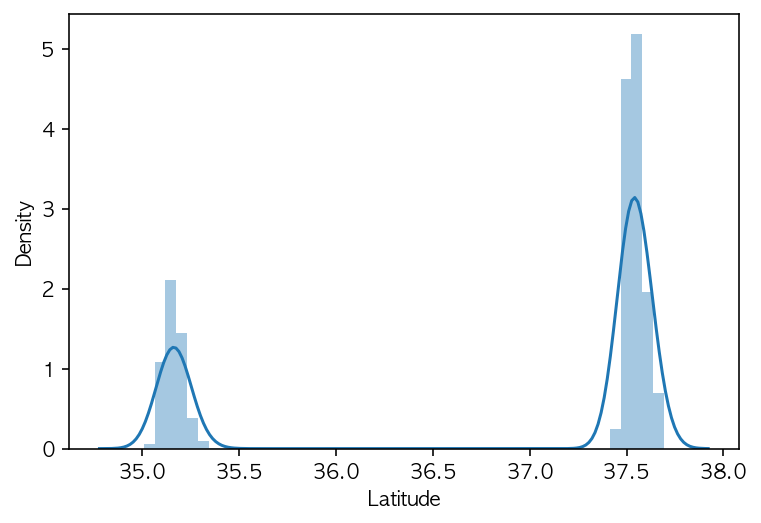

In [23]:
# distplot for latitude
# .csv file includes data from two cities: Seoul(North West) and Busan(South East)
# Therefore, dats is distributed into two clusters

sb.distplot(df["Latitude"])

/Users/bagbyeongseon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Latitude', ylabel='Density'>

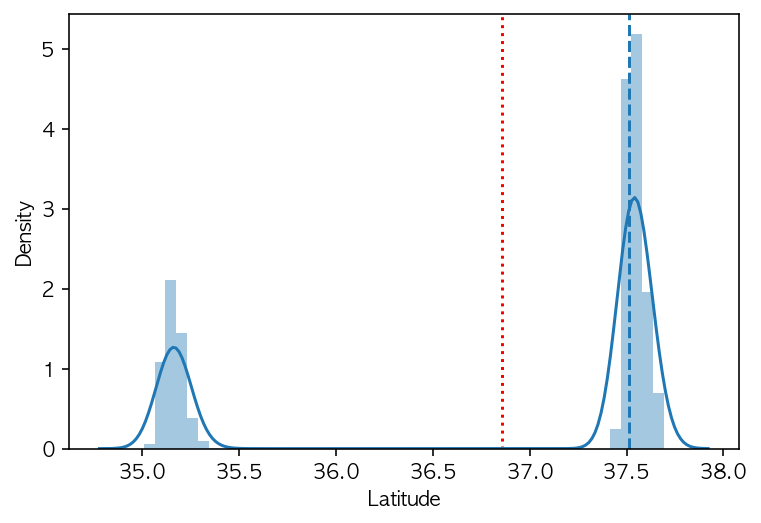

In [24]:
# dipict mean and median on the plot
plt.axvline(df["Latitude"].mean(), linestyle=":", color="r")
plt.axvline(df["Latitude"].median(), linestyle="--")
sb.distplot(df["Latitude"])

/Users/bagbyeongseon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Longitude', ylabel='Density'>

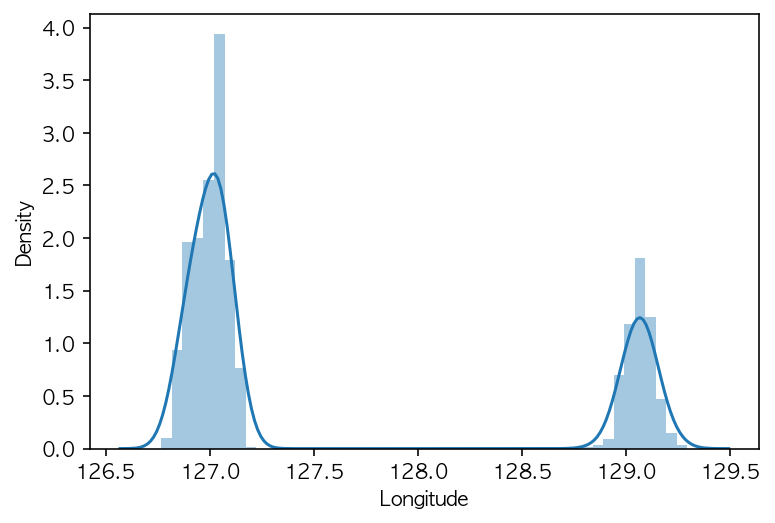

In [25]:
# distplot for longtitude
sb.distplot(df["Longitude"])

### Bivariant Variable Visualization: Correlation Analysis

In [26]:
corr = df.corr()
corr

,Longitude,Latitude
Longitude,1.000000,-0.994711
Latitude,-0.994711,1.000000


<ipython-input-27-c48e56e78e3c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

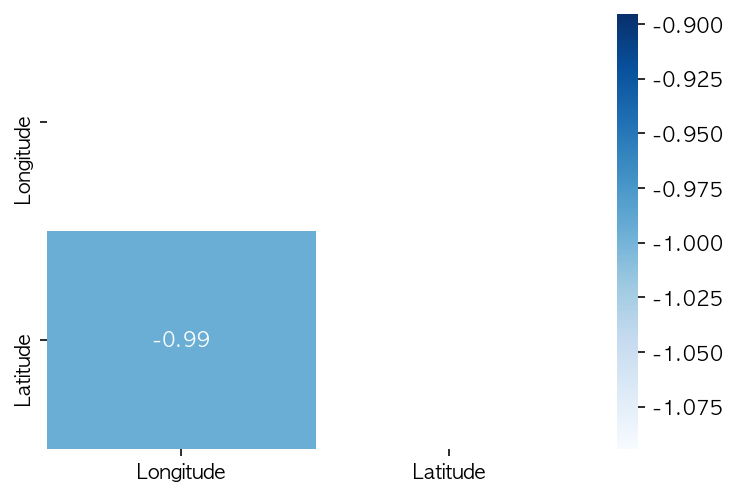

In [27]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sb.heatmap(corr, annot=True, cmap="Blues", mask=mask)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

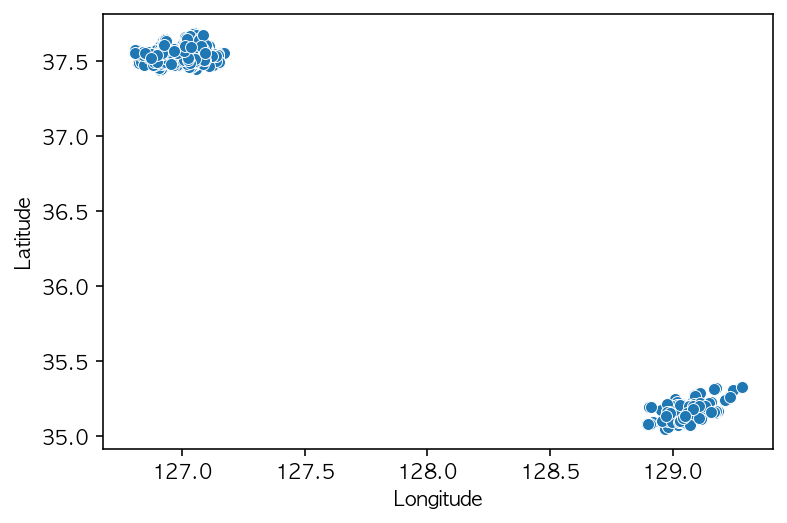

In [28]:
# scatter plot
sb.scatterplot(data=df.sample(1000), x="Longitude", y="Latitude")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

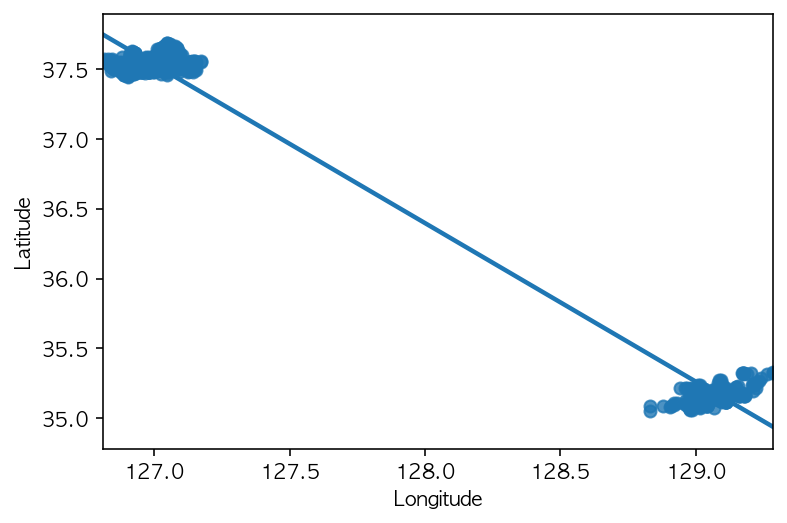

In [29]:
# regression line
sb.regplot(data=df.sample(1000), x="Longitude", y="Latitude")

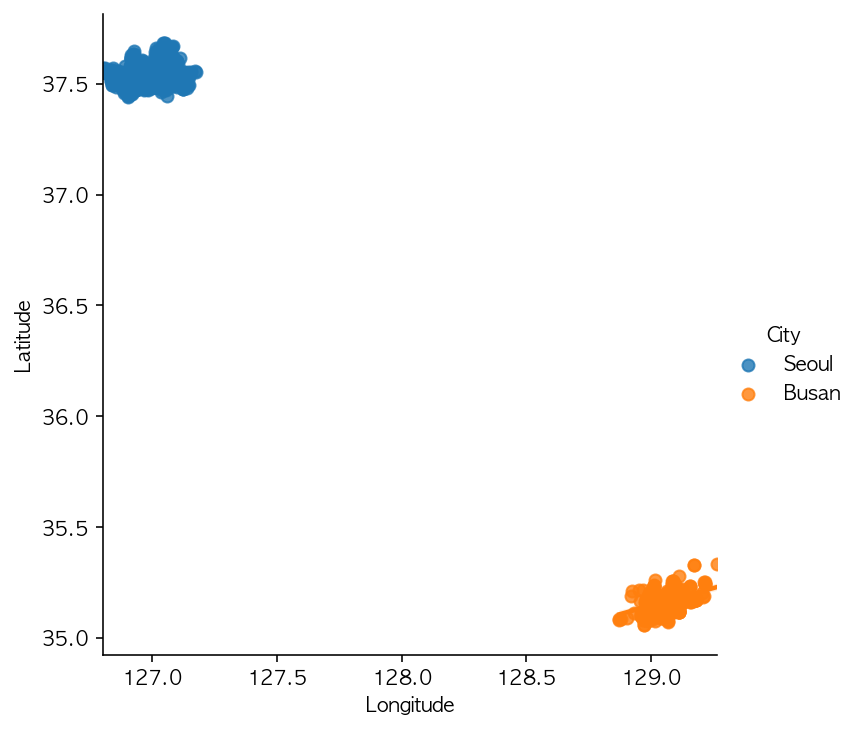

In [30]:
# tropics visualization
sb.lmplot(data=df.sample(1000), x="Longitude", y="Latitude", hue="City")

### 'Object' Type Data Summarize

In [31]:
# include="object"
df.describe(include="object")

,Store Name,Business Type,Subtype,Specialty,City,District,Address
count,573679,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,190486
top,점프셈교실,Restaurant,Korean Food,한식/백반/한정식,Seoul,Gangnam-gu,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,1058


In [32]:
df["Business Type"].describe()

count         573680
unique             9
top       Restaurant
freq          185516
Name: Business Type, dtype: object

In [33]:
df["Business Type"].unique()

array(['Restaurant', 'Service', 'Retail', 'Hospital/Pharmacy',
       'Education', 'Leisure/Travel/Entertainment', 'Finance', 'Hotel',
       'Sports Centre'], dtype=object)

In [34]:
df["Business Type"].nunique()

9

In [68]:
df["Business Type"].value_counts()

Restaurant                      185516
Retail                          179460
Service                          97789
Education                        42477
Hospital/Pharmacy                25509
Finance                          20918
Leisure/Travel/Entertainment     16377
Hotel                             5327
Sports Centre                      307
Name: Business Type, dtype: int64

## 4. Food Business Analysis: Boolean Indexing

In [69]:
df[df["District"] == "Gangnam-gu"].head()

,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude
0,와라와라호프,Restaurant,Bar/Liquor Store,호프/맥주,Seoul,Gangnam-gu,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Gangnam-gu,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,Restaurant,Snack,라면김밥분식,Seoul,Gangnam-gu,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,Restaurant,Japanese/Seafood,낙지/오징어,Seoul,Gangnam-gu,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
38,타워광명내과의원,Hospital/Pharmacy,병원,내과/외과,Seoul,Gangnam-gu,서울특별시 강남구 언주로30길 39,127.053198,37.488742


In [70]:
df[(df["District"] == "Gangnam-gu") & (df["Business Type"] == "Restaurant")]["Subtype"].value_counts()

Korean Food          4371
Caffe/Tea            2790
Western/Italian      1573
Bar/Liquor Store     1573
Japanese/Seafood     1255
Snack                1197
Fast Food             786
Bread/Cake/Cookie     650
Chicken               539
Chinese/Hong Kong     358
Fusion                341
Buffet                 63
기타음식업                  47
음식배달서비스                11
Name: Subtype, dtype: int64

In [71]:
# recommended
df.loc[(df["District"] == "Gangnam-gu") & (df["Business Type"] == "Restaurant"), "Business Type"].value_counts()

Restaurant    15554
Name: Business Type, dtype: int64

### Food Business Types Analysis

In [72]:
df_seoul_food = df[(df["City"] == "Seoul") & (df["Business Type"] == "Restaurant")].copy()
df_seoul_food.shape

(132889, 9)

In [73]:
# extract data by "Area" and "Subtype" columns
food_area = df_seoul_food.groupby(["District","Subtype"])["Store Name"].count()
food_area

District    Subtype          
Dobong-gu   Bar/Liquor Store      339
            Bread/Cake/Cookie     138
            Buffet                 10
            Caffe/Tea             288
            Chicken               226
                                 ... 
Yongsan-gu  Korean Food          1497
            Snack                 351
            Western/Italian       605
            기타음식업                  10
            음식배달서비스                 6
Name: Store Name, Length: 348, dtype: int64

<AxesSubplot:ylabel='Subtype'>

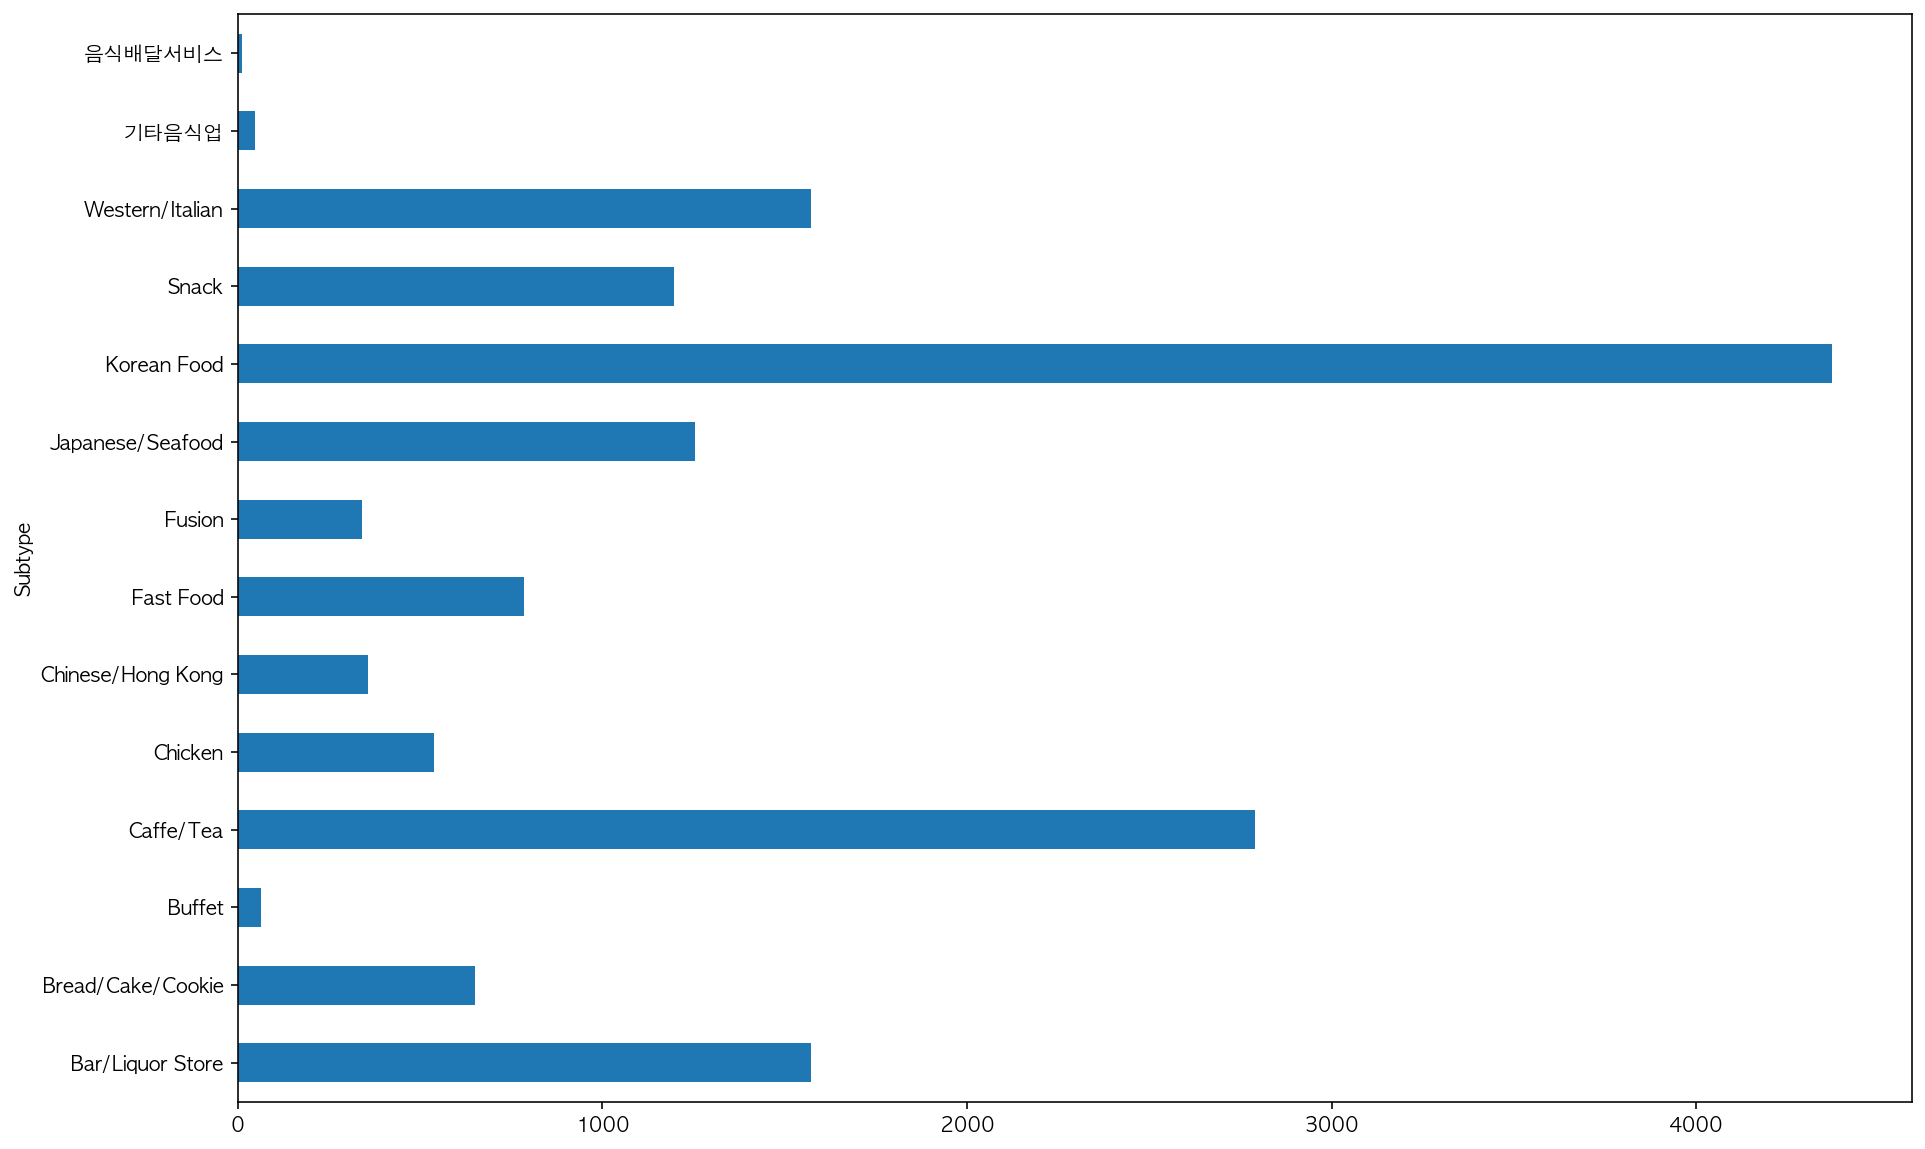

In [74]:
# visualization by pandas
food_area.unstack().loc["Gangnam-gu"].plot.barh(figsize=(15,10))

<AxesSubplot:xlabel='Number', ylabel='District'>

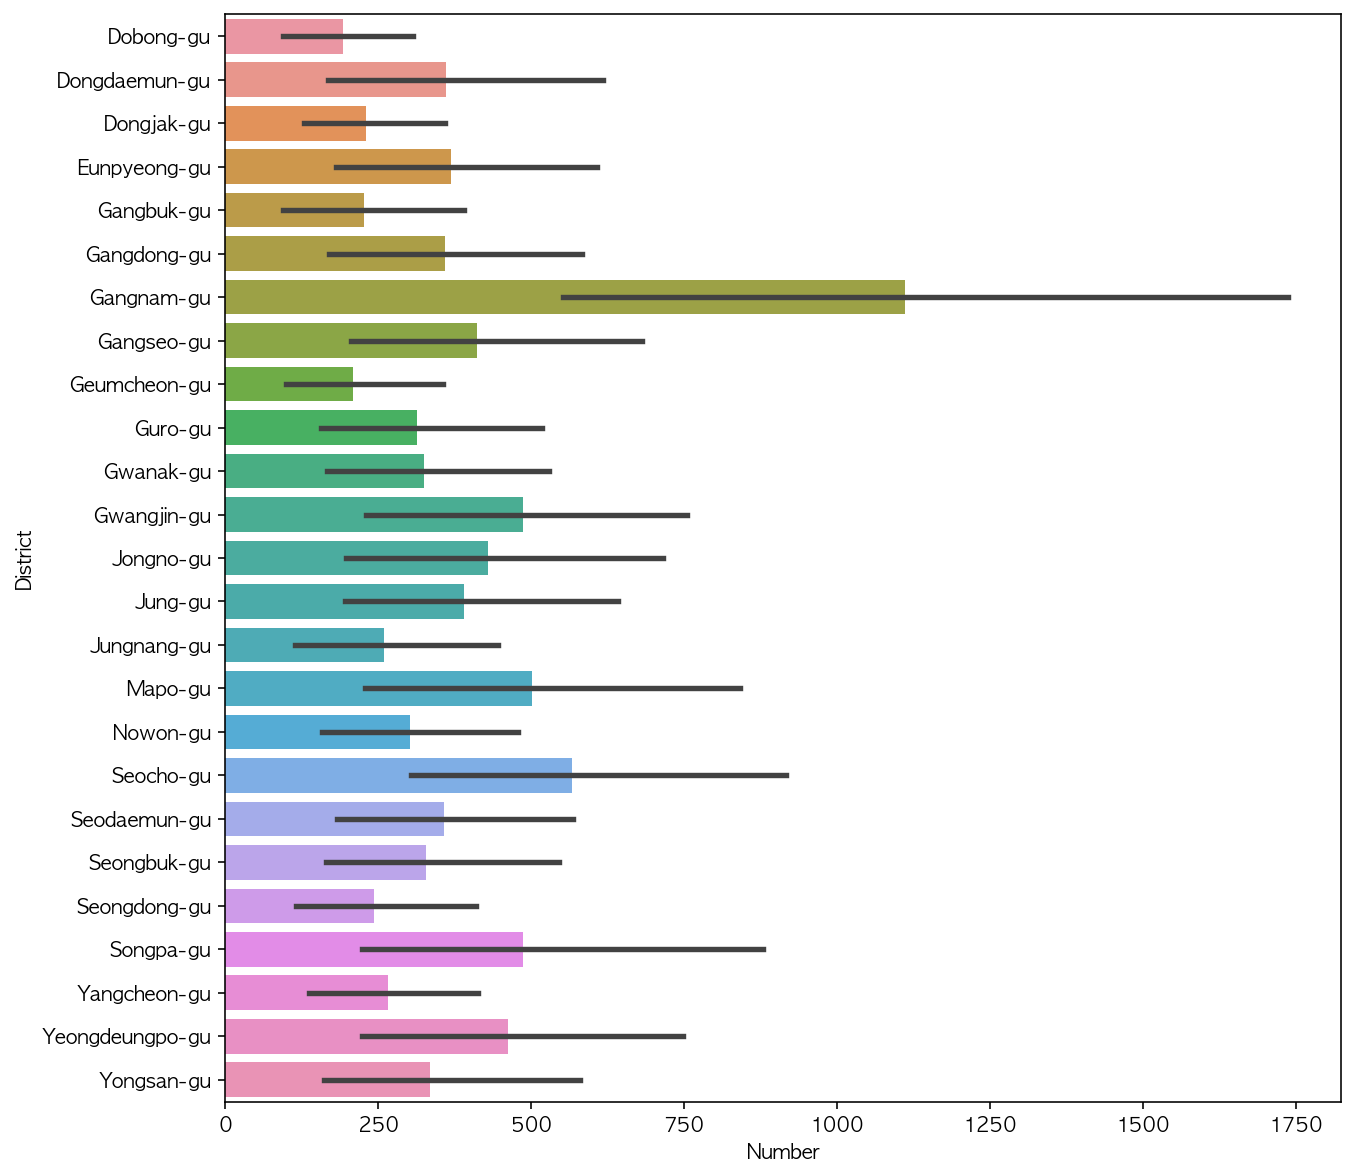

In [75]:
# visualization by seaborn
# when using seaborn, it is better to reset index to 0 based
food = food_area.reset_index()
food = food.rename(columns={"Store Name":"Number"})
plt.figure(figsize=(10,10))
sb.barplot(data=food, y="District", x="Number")

<AxesSubplot:xlabel='Subtype', ylabel='Number'>

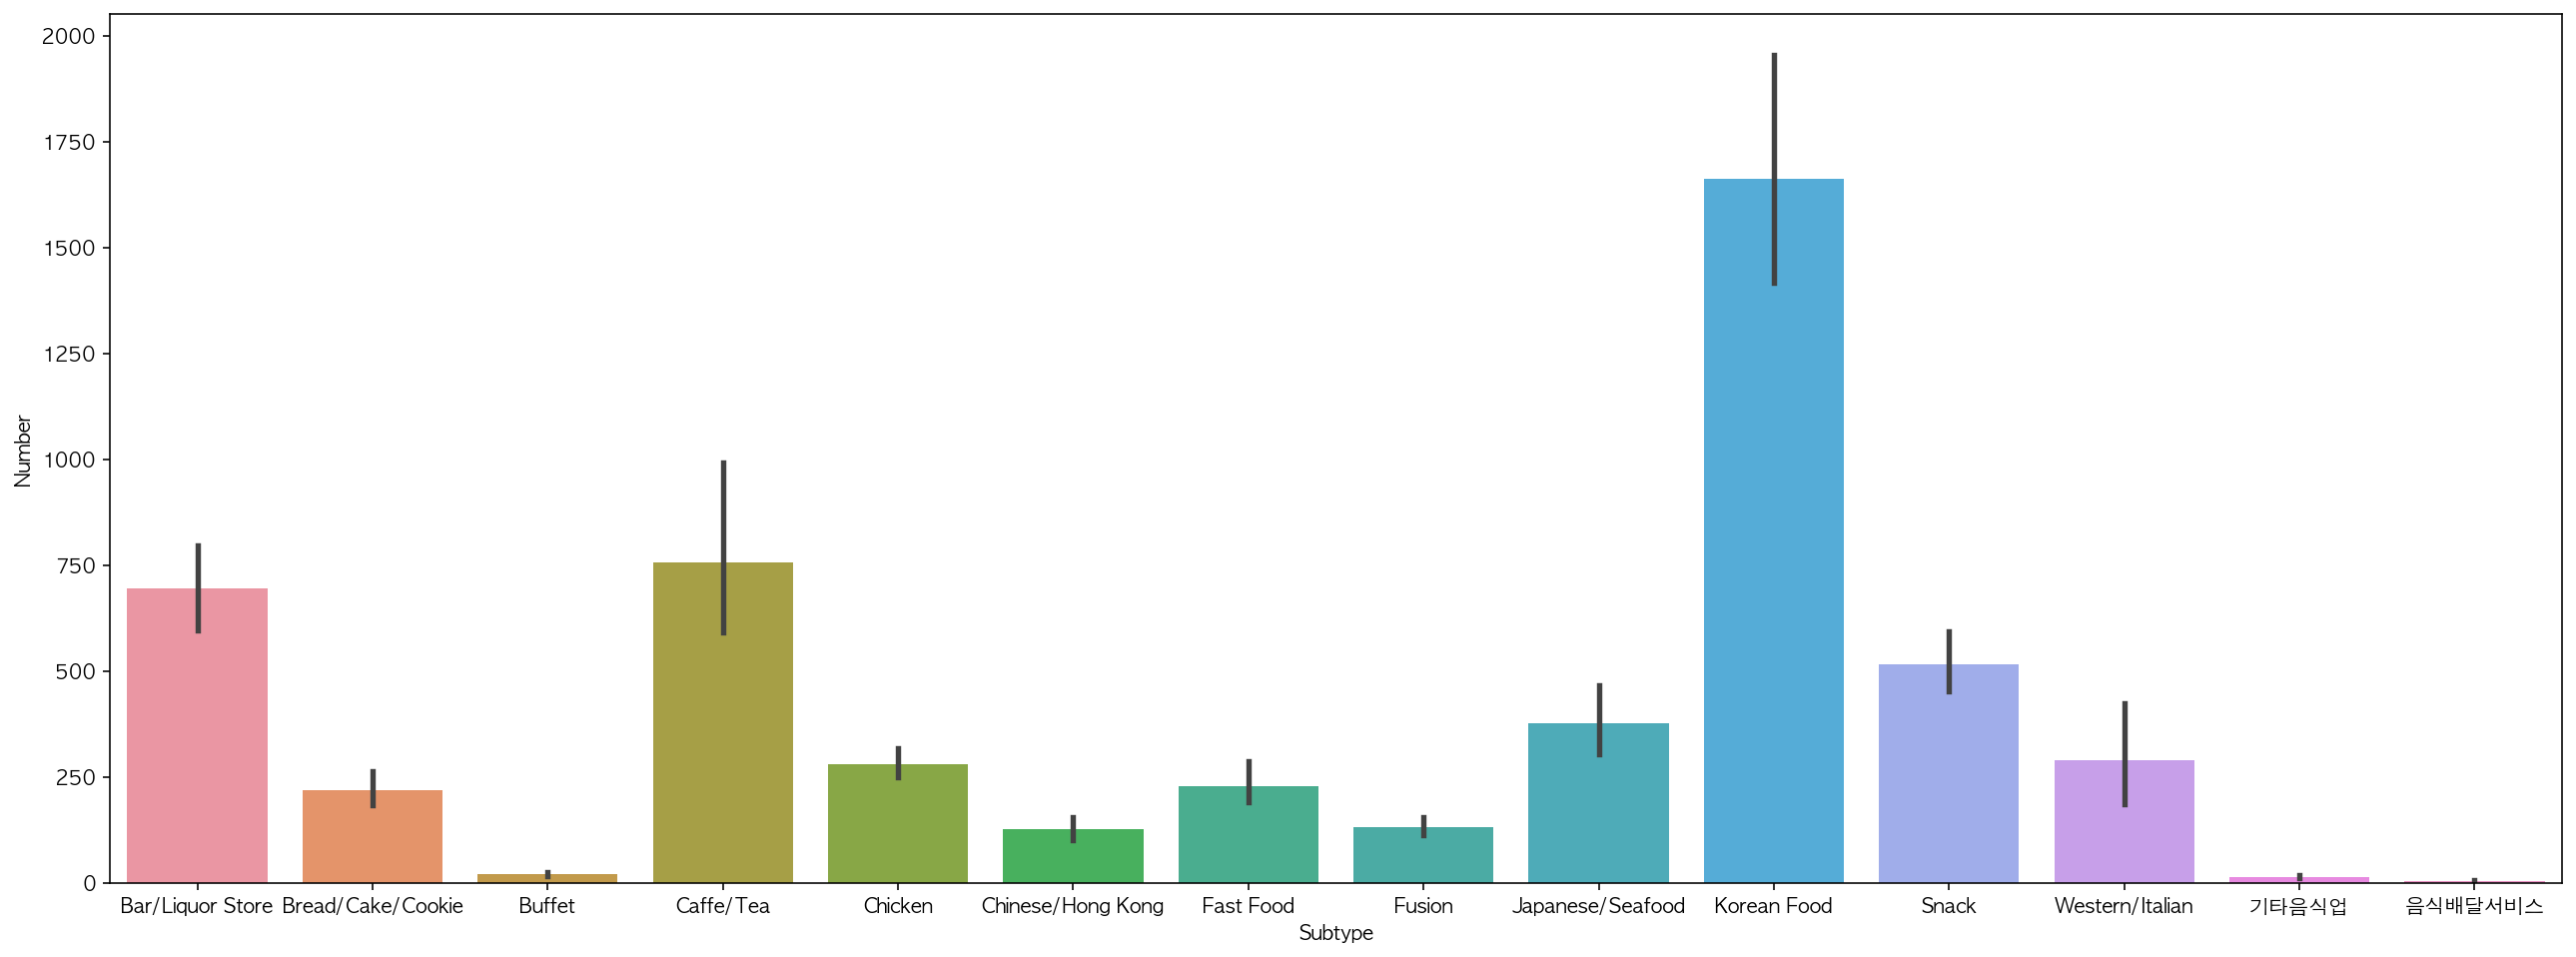

In [76]:
plt.figure(figsize=(22,8))
sb.barplot(data=food, x="Subtype", y="Number")

## 5. Subset Analysis - Education Business

In [77]:
df["Business Type"].unique()

array(['Restaurant', 'Service', 'Retail', 'Hospital/Pharmacy',
       'Education', 'Leisure/Travel/Entertainment', 'Finance', 'Hotel',
       'Sports Centre'], dtype=object)

In [78]:
df_academy = df[(df["City"] == "Seoul") & (df["Business Type"] == "Education")].copy()
df_academy.head()

,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude
85,GIA보석교육원,Education,학원-자격/국가고시,학원-보석감정,Seoul,Gangnam-gu,서울특별시 강남구 압구정로 320,127.036437,37.528532
101,안재형영어,Education,학원-어학,학원-외국어/어학,Seoul,Yangcheon-gu,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,Education,학원-음악미술무용,서예/서화/미술,Seoul,Gangseo-gu,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
126,경찰태권도,Education,학원-예능취미체육,태권도장,Seoul,Seongbuk-gu,서울특별시 성북구 길음로 20,127.023020,37.604749
134,아트인스튜디오,Education,학원-음악미술무용,서예/서화/미술,Seoul,Gangnam-gu,서울특별시 강남구 강남대로96길 12,127.028054,37.499729


In [79]:
df_academy["Store Name"].value_counts().head(10)

점프셈교실      1659
해법수학         57
윤선생영어교실      34
뮤엠영어         27
해법영어교실       24
눈높이          22
해동검도         22
삼성영어         21
구몬학습         20
경희대태권도       19
Name: Store Name, dtype: int64

In [80]:
df_academy["District"].value_counts()

Gangnam-gu         4005
Seocho-gu          2103
Yangcheon-gu       1881
Gwangjin-gu        1848
Songpa-gu          1797
Gangdong-gu        1585
Nowon-gu           1582
Gangseo-gu         1498
Eunpyeong-gu       1333
Gwanak-gu          1313
Seongbuk-gu        1246
Guro-gu            1140
Dongdaemun-gu      1051
Dongjak-gu         1050
Mapo-gu            1007
Yeongdeungpo-gu     984
Dobong-gu           931
Jungnang-gu         884
Seodaemun-gu        773
Seongdong-gu        742
Geumcheon-gu        701
Jongno-gu           638
Gangbuk-gu          513
Yongsan-gu          491
Jung-gu             413
Name: District, dtype: int64

In [81]:
academy_count = df_academy["Specialty"].value_counts().head(30)
academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000.head()

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
Name: Specialty, dtype: int64

In [82]:
academy_group = df_academy.groupby(["District","Specialty"])["Store Name"].count()
academy_group.loc["Gangnam-gu"]

Specialty
검도도장          9
고시원         139
놀이방           8
독서실         125
서예/서화/미술    219
           ... 
학원-편입         5
학원-피부미용       3
학원-한복기술       1
학원/국가고시       5
합기도장          4
Name: Store Name, Length: 73, dtype: int64

In [83]:
t = academy_group.reset_index()
t = t.rename(columns={"Store Name":"Number"})
t.head()

,District,Specialty,Number
0,Dobong-gu,검도도장,1
1,Dobong-gu,고시원,8
2,Dobong-gu,놀이방,2
3,Dobong-gu,독서실,30
4,Dobong-gu,서예/서화/미술,25


### Visualization by Seaborn

<AxesSubplot:xlabel='Number', ylabel='District'>

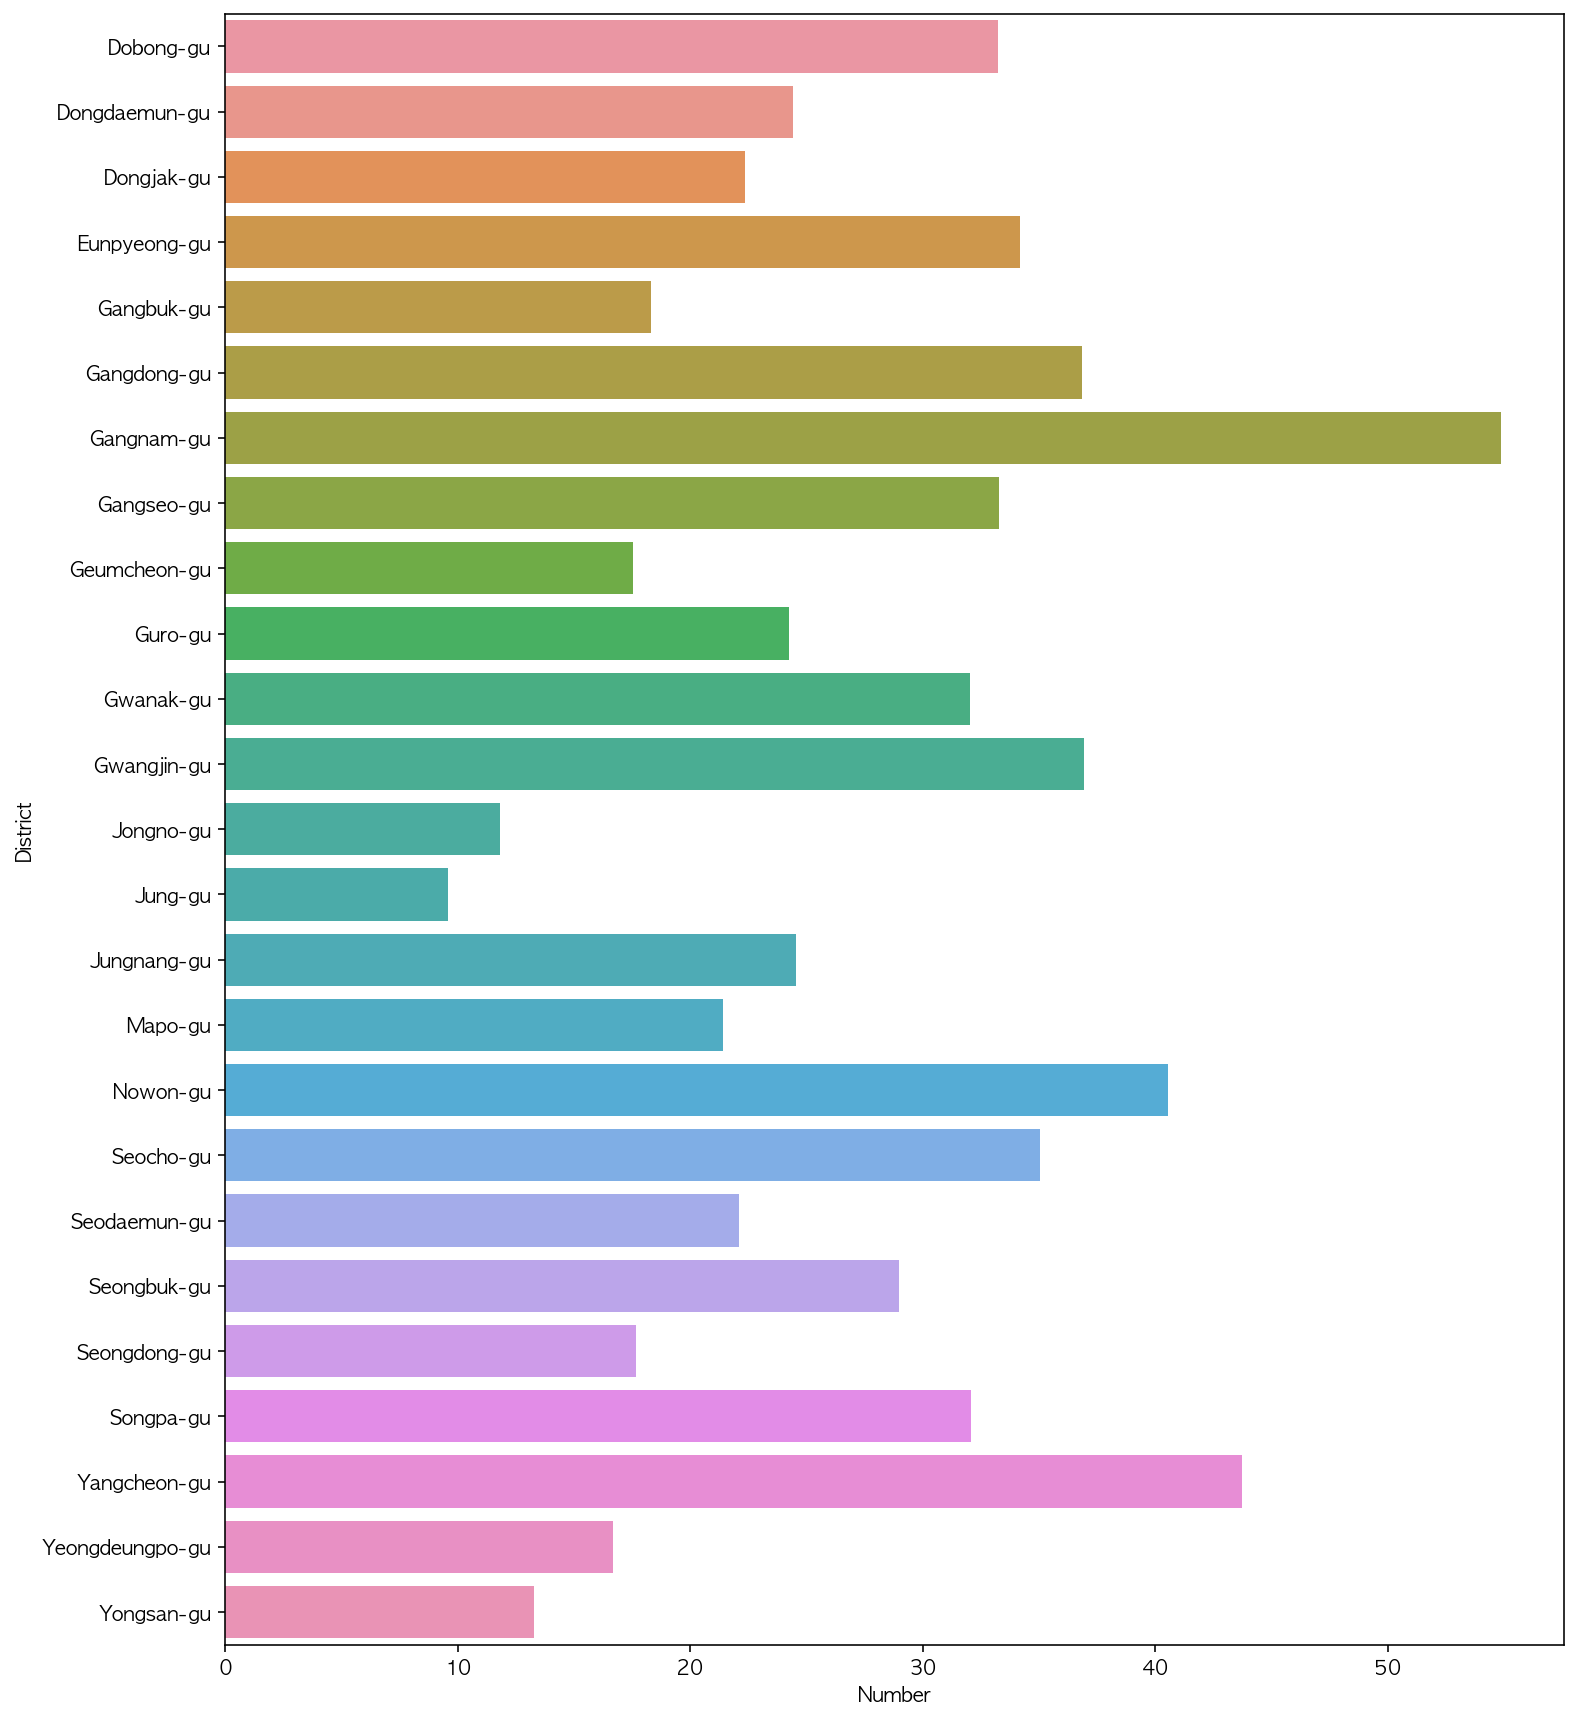

In [84]:
# ci = confidential interval
plt.figure(figsize=(12,15))
sb.barplot(data=t, x="Number", y="District", ci=None)

### Subset by 'isin'

In [85]:
print(df_academy.shape)
df_academy_selected = df_academy[df_academy["Specialty"].isin(academy_count_1000.index)]
df_academy_selected.head()

(31509, 9)


,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude
101,안재형영어,Education,학원-어학,학원-외국어/어학,Seoul,Yangcheon-gu,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,Education,학원-음악미술무용,서예/서화/미술,Seoul,Gangseo-gu,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
134,아트인스튜디오,Education,학원-음악미술무용,서예/서화/미술,Seoul,Gangnam-gu,서울특별시 강남구 강남대로96길 12,127.028054,37.499729
151,삼익피아노강동대리점,Education,학원-음악미술무용,피아노/바이올린/기타,Seoul,Gangdong-gu,서울특별시 강동구 진황도로 18,127.129075,37.539262
153,파랑새어린이집,Education,유아교육,어린이집,Seoul,Dobong-gu,서울특별시 도봉구 덕릉로 329,127.045486,37.644831
